In [5]:
#Question 4 UrbanIQ Analytivs (Median Housing price prediction)
#Linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Dataset loading
df = pd.read_csv('/content/Housing.csv')

#Data preprocessing
df = df.drop(columns=['id', 'date'])

# target
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# SVM Regression
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluation
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

print("\nSVM Regression:")
print("R² Score:", r2_score(y_test, y_pred_svm))
print("MSE:", mean_squared_error(y_test, y_pred_svm))


Linear Regression:
R² Score: 0.7011905706891326
MSE: 45173027114.56454

SVM Regression:
R² Score: -0.06307733970761209
MSE: 160712537091.76227


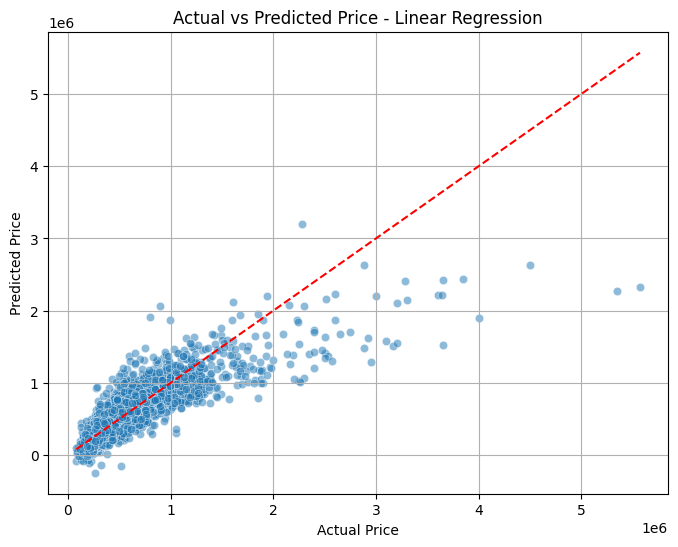

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot (Linear Regression)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Linear Regression')
plt.grid(True)
plt.show()